<a href="https://colab.research.google.com/github/Sam-bordelon/CSC467FinalProject/blob/main/CSC467ProjectF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [ ]:
pd_data = pd.read_csv('parkinsons.csv')
pd_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
pd_features = pd_data.drop(['name','status'], axis=1).values
pd_target = pd_data['status'].values

In [ ]:
#Different train-test data splits for models
splits = [
    ('70-30', 0.3),
    ('80-20', 0.2),
    ('90-10', 0.1)
]
result_split=["70-30","80-20","90-10"]

# Logistic Regression (Forrest Wright)

In [ ]:
# Logistic Regression Model (Forrest Wright)
from sklearn.linear_model import LogisticRegression
# Initialize and fit Logistic Regression model
pd_lr = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')

# Parameters for Logistic Regression
param_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# List to store F1 and Accuracy scores
resultsAcc_lr = []
resultsF1_lr = []

for split_name, test_ratio in splits:
  pd_train_ftrs, pd_test_ftrs, pd_train_tgt, pd_test_tgt = train_test_split(pd_features, pd_target,
                                                                          test_size=test_ratio, random_state=0)
  scaler = StandardScaler()
  pd_train_ftrs = scaler.fit_transform(pd_train_ftrs)
  pd_test_ftrs = scaler.transform(pd_test_ftrs)

# Perform GridSearchCV
  grid_pd_lr = GridSearchCV(
        estimator=pd_lr,
        param_grid=param_lr,
        scoring='accuracy',  # Metric to optimize
        cv=5,                # Cross-validation folds
        n_jobs=-1
    )
  pd_lr_tuned = grid_pd_lr.fit(pd_train_ftrs, pd_train_tgt)
# Make predictions
  pd_lr_pred = pd_lr_tuned.best_estimator_.predict(pd_test_ftrs)

# Evaluation
  print(f"\nLogistic Regression Test Set Classification Report ({split_name}):")
  print(metrics.classification_report(pd_test_tgt, pd_lr_pred))
  print("\nLogistic Regression Test Set Accuracy Score")
  print(metrics.accuracy_score(pd_test_tgt, pd_lr_pred))
  print("\nLogistic Regression Test Set F1 Score")
  print(metrics.f1_score(pd_test_tgt, pd_lr_pred))


  resultsF1_lr.append(metrics.f1_score(pd_test_tgt, pd_lr_pred))
  resultsAcc_lr.append(metrics.accuracy_score(pd_test_tgt, pd_lr_pred))

# Variable for comparing highest-scoring split of the model
lr_best_split = [resultsF1_lr[0], resultsAcc_lr[0]]




Logistic Regression Test Set Classification Report (70-30):
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        13
           1       0.90      0.80      0.85        46

    accuracy                           0.78        59
   macro avg       0.70      0.75      0.72        59
weighted avg       0.81      0.78      0.79        59


Logistic Regression Test Set Accuracy Score
0.7796610169491526

Logistic Regression Test Set F1 Score
0.8505747126436781

Logistic Regression Test Set Classification Report (80-20):
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.88      0.72      0.79        29

    accuracy                           0.72        39
   macro avg       0.67      0.71      0.68        39
weighted avg       0.77      0.72      0.73        39


Logistic Regression Test Set Accuracy Score
0.717948717948718

Logistic Regression Test Set F1 Score


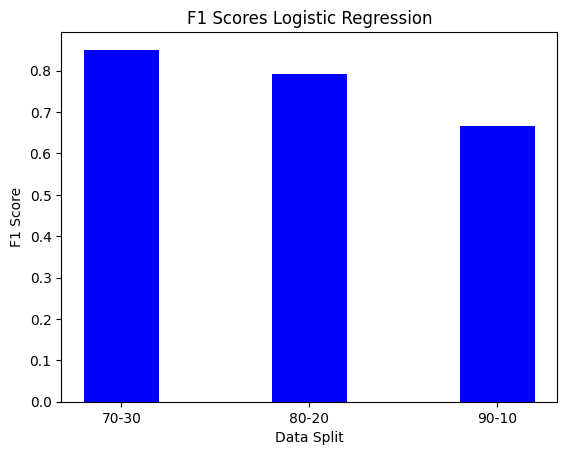

In [ ]:
plt.bar(result_split, resultsF1_lr, color='blue', width=0.4)
plt.ylabel("F1 Score")
plt.xlabel("Data Split")
plt.title("F1 Scores Logistic Regression")
plt.show()

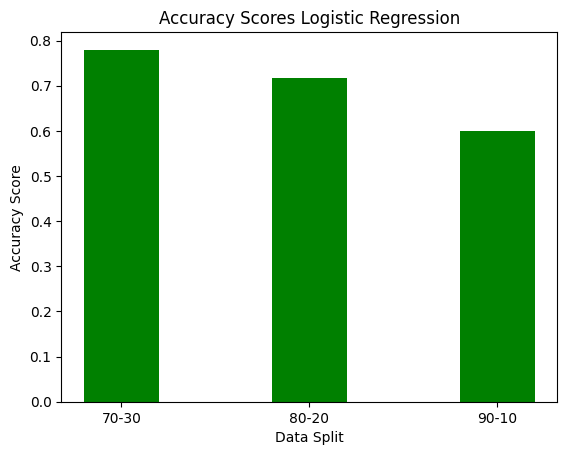

In [ ]:
plt.bar(result_split, resultsAcc_lr, color='green', width=0.4)
plt.ylabel("Accuracy Score")
plt.xlabel("Data Split")
plt.title("Accuracy Scores Logistic Regression")
plt.show()

In [ ]:
# @title Random Forest (Kenderth Calzadilla))


In [ ]:
#Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Initializing RandomForest model and fitting data
pd_rf = RandomForestClassifier(random_state=42)

# List to store Accuracy/F1 scores between models
resultsAcc_rf = []
resultsF1_rf = []

for split_name, split_ratio in splits:
    pd_train_ftrs, pd_test_ftrs, pd_train_tgt, pd_test_tgt = train_test_split(pd_features, pd_target,
                                                                              test_size=split_ratio, random_state=42)
    pd_rf.fit(pd_train_ftrs, pd_train_tgt)
    pd_rf_pred = pd_rf.predict(pd_test_ftrs)

    print(f"\n Random Forest split: {split_name}" )
    print("\nRandom Forest Test Set Classification Report")
    print(metrics.classification_report(pd_test_tgt, pd_rf_pred))
    print("\nRandom Forest Test Set Accuracy Score")
    print(metrics.accuracy_score(pd_test_tgt, pd_rf_pred))

    print("\nRandom Forest Test Set F1 Score")
    print(metrics.f1_score(pd_test_tgt, pd_rf_pred))


    resultsF1_rf.append(metrics.f1_score(pd_test_tgt, pd_rf_pred))
    resultsAcc_rf.append(metrics.accuracy_score(pd_test_tgt, pd_rf_pred))
    # Extracting data for confusion matrix of best split
    if (split_ratio == 0.2):
      cm_test_tgt = pd_test_tgt
      cm_pred = pd_rf_pred

# Variable for comparing highest-scoring split of the model
rf_best_split = [resultsF1_rf[1], resultsAcc_rf[1]]


 Random Forest split: 70-30

Random Forest Test Set Classification Report
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59


Random Forest Test Set Accuracy Score
0.9322033898305084

Random Forest Test Set F1 Score
0.9555555555555556

 Random Forest split: 80-20

Random Forest Test Set Classification Report
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


Random Forest Test Set Accuracy Score
0.9487179487179487

Random Forest Test Set F1 S

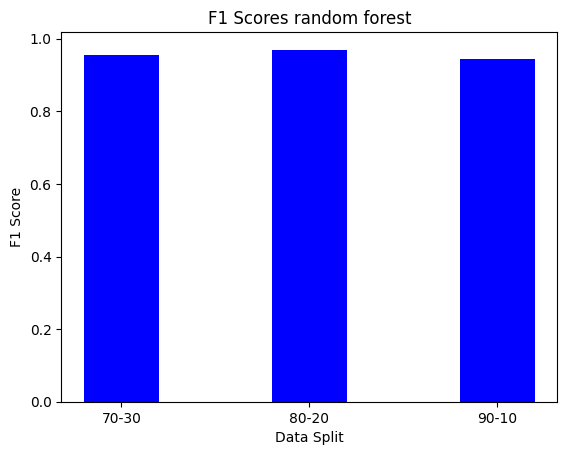

In [ ]:
result_split=["70-30","80-20","90-10"]
plt.bar(result_split, resultsF1_rf, color='blue', width=0.4)
plt.ylabel("F1 Score")
plt.xlabel("Data Split")
plt.title("F1 Scores random forest")
plt.show()

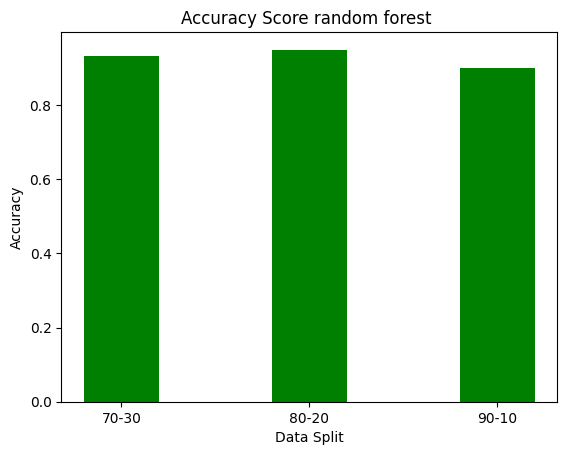

In [ ]:
result_split=["70-30","80-20","90-10"]
plt.bar(result_split, resultsAcc_rf, color='green', width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Data Split")
plt.title("Accuracy Score random forest ")
plt.show()

# Random Forest Hyper parameter Tuning Fail

In [ ]:
#Library for Random Forest
#from sklearn.ensemble import RandomForestClassifier


#Initializing RandomForest model and fitting data
#pd_rf = RandomForestClassifier(random_state=42)

#param_rf = {
#    'n_estimators': np.arange(1, 50,10),
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': np.arange(2, 11,1),
#    'min_samples_leaf': np.arange(1, 5, 1),
#    'max_features': ['sqrt', 'log2', None]
#}

#for split_name, test_ratio in splits:
#  pd_train_ftrs, pd_test_ftrs, pd_train_tgt, pd_test_tgt = train_test_split(pd_features, pd_target,
#                                                                         test_size=test_ratio, random_state=0)
#  scaler = StandardScaler()
#  pd_train_ftrs = scaler.fit_transform(pd_train_ftrs)
#  pd_test_ftrs = scaler.transform(pd_test_ftrs)

# GridSearchCV for Random Forest
#  grid_pd_rf = GridSearchCV(
#    estimator=pd_rf,
#    param_grid=param_rf,
#    scoring='accuracy',
#    cv=5,
#    n_jobs=-1
#)

 # pd_rf = grid_pd_rf.fit(pd_train_ftrs, pd_train_tgt)

  #Make prediction
#  pd_rf_pred = pd_rf.best_estimator.predict(pd_test_ftrs)
#
#  print(f"Random Forest Results for Split: {split_name}")

#  print("Random Forest Test Set Classification Report")
#  print(metrics.classification_report(pd_test_tgt, pd_rf_pred))

#  print("\nRandom Forest Test Set Accuracy Score")
#  print(metrics.accuracy_score(pd_test_tgt, pd_rf_pred))

#  print("\nRandom Forest Test Set F1 Score")
#  print(metrics.f1_score(pd_test_tgt, pd_rf_pred))

# K-Nearest Neighbor (Sam Bordelon)

In [ ]:
# Importing K-Nearest Neighbor from library
from sklearn.neighbors import KNeighborsClassifier

# Initializing and fitting the KNN model, the default number of neighbors is 5
pd_knn = KNeighborsClassifier()

# List to store F1/Accuracy scores between models
resultsAcc_knn = []
resultsF1_knn = []

for split_name ,split_ratio in splits:
    pd_train_ftrs, pd_test_ftrs, pd_train_tgt, pd_test_tgt = train_test_split(pd_features, pd_target,
                                                                              test_size=split_ratio, random_state=42)
    pd_knn.fit(pd_train_ftrs, pd_train_tgt)
    pd_knn_pred = pd_knn.predict(pd_test_ftrs)

    print(f"\nKNN Results for Split: {split_name}")
    print("\nK-Nearest Neighbor Test Set Classification Report")
    print(metrics.classification_report(pd_test_tgt, pd_knn_pred))

    print("\nK-Nearest Neighbor Test Set Accuracy Score")
    print(metrics.accuracy_score(pd_test_tgt, pd_knn_pred))

    print("\nK-Nearest Neighbor Test Set F1 Score")
    print(metrics.f1_score(pd_test_tgt, pd_knn_pred))

    # List to store F1 scores between models

    resultsF1_knn.append(metrics.f1_score(pd_test_tgt, pd_knn_pred))
    resultsAcc_knn.append(metrics.accuracy_score(pd_test_tgt, pd_knn_pred))

# Variable for comparing highest-scoring split of the model
knn_best_split = [resultsF1_knn[0], resultsAcc_knn[0]]


KNN Results for Split: 70-30

K-Nearest Neighbor Test Set Classification Report
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.85      0.93      0.89        44

    accuracy                           0.83        59
   macro avg       0.79      0.73      0.75        59
weighted avg       0.82      0.83      0.82        59


K-Nearest Neighbor Test Set Accuracy Score
0.8305084745762712

K-Nearest Neighbor Test Set F1 Score
0.8913043478260869

KNN Results for Split: 80-20

K-Nearest Neighbor Test Set Classification Report
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39


K-Nearest Neighbor Test Set Accuracy Score
0.8205128205128205



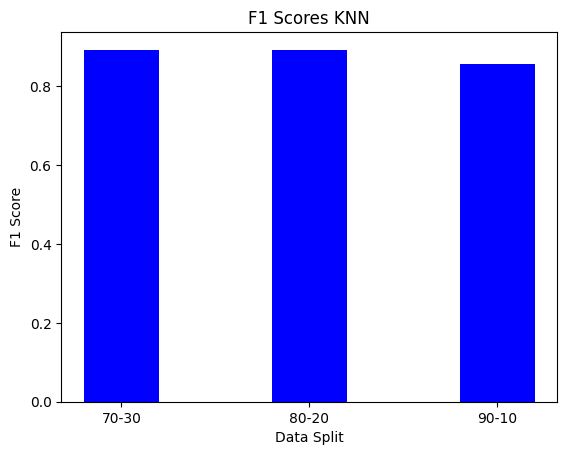

In [ ]:
result_split=["70-30","80-20","90-10"]
plt.bar(result_split, resultsF1_knn, color='blue', width=0.4)
plt.ylabel("F1 Score")
plt.xlabel("Data Split")
plt.title("F1 Scores KNN")
plt.show()

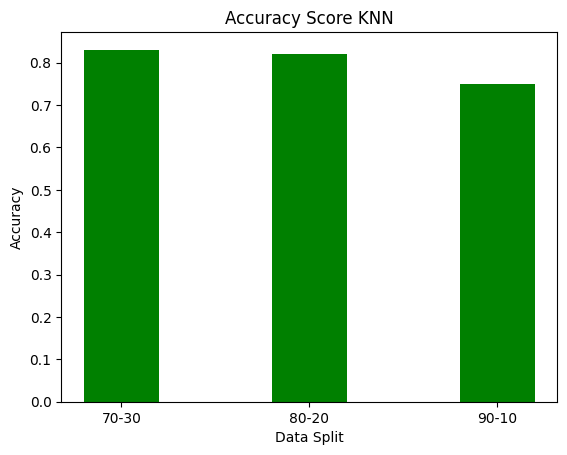

In [ ]:
result_split=["70-30","80-20","90-10"]
plt.bar(result_split, resultsAcc_knn, color='green', width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Data Split")
plt.title("Accuracy Score KNN")
plt.show()




In [ ]:
# @title KNN -Hyper Parameter Tuning(Fail)
#param_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan', 'chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#}


#for split_name, test_ratio in splits:
# pd_train_ftrs, pd_test_ftrs, pd_train_tgt, pd_test_tgt = train_test_split(pd_features, pd_target, test_size=test_ratio, random_state=0)
#  scaler = StandardScaler()
#  pd_train_ftrs = scaler.fit_transform(pd_train_ftrs)
#  pd_test_ftrs = scaler.transform(pd_test_ftrs)

#  grid_knn = GridSearchCV(estimator=pd_knn, param_grid=param_knn, scoring='accuracy', cv=5, n_jobs=-1)
#  grid_knn = grid_knn.fit(pd_train_ftrs, pd_train_tgt)
#  pd_knn_pred = pd_knn.best_estimator_.predict(pd_test_ftrs)


#  print("K-Nearest Neighbor Test Set Classification Report")
#  print(f"KNN Results for Split: {split_name}")
#  print(metrics.classification_report(pd_test_tgt, pd_knn_pred))
#  print("\nK-Nearest Neighbor Test Set Accuracy Score")
#  print(metrics.accuracy_score(pd_test_tgt, pd_knn_pred))
#  print("\nK-Nearest Neighbor Test Set F1 Score")
#  print(metrics.f1_score(pd_test_tgt, pd_knn_pred))

# Model Prediction Analysis

In [ ]:
# Graphs comparing models to each other

In [ ]:
model_f1_scores = (rf_best_split[0], knn_best_split[0], lr_best_split[0])
model_accuracy_scores = (rf_best_split[1], knn_best_split[1], lr_best_split[1])
models = ('Random Forest' ,'K-Nearest Neighbor', 'Logistic Regression')

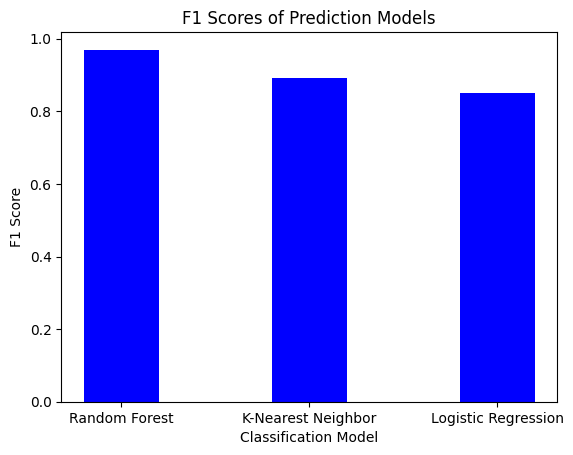

In [ ]:
plt.bar(models, model_f1_scores, color='blue', width=0.4)
plt.xlabel("Classification Model")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Prediction Models")
plt.show()


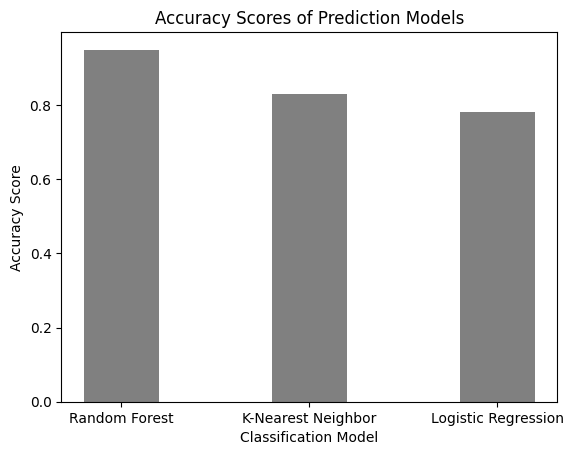

In [ ]:
plt.bar(models, model_accuracy_scores, color='grey', width=0.4)
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Prediction Models")
plt.show()

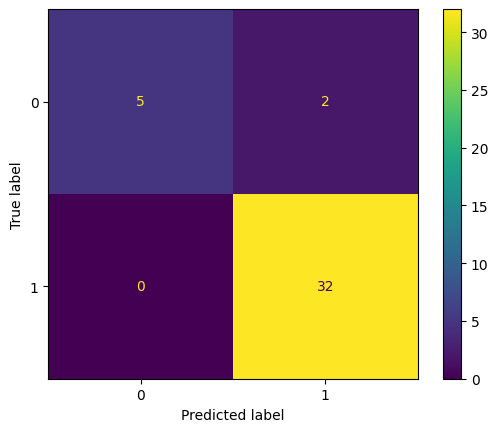

In [ ]:
# Confusion matrix for best overall model (Random Forest 80-20 Split)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

best_matrix = confusion_matrix(cm_test_tgt, cm_pred)
display = ConfusionMatrixDisplay(confusion_matrix=best_matrix)
display.plot()
plt.show()